# Transformada de Fourier

A transformada de Fourier pode ser usada para editar imagens. Usaremos o Numpy para isso.

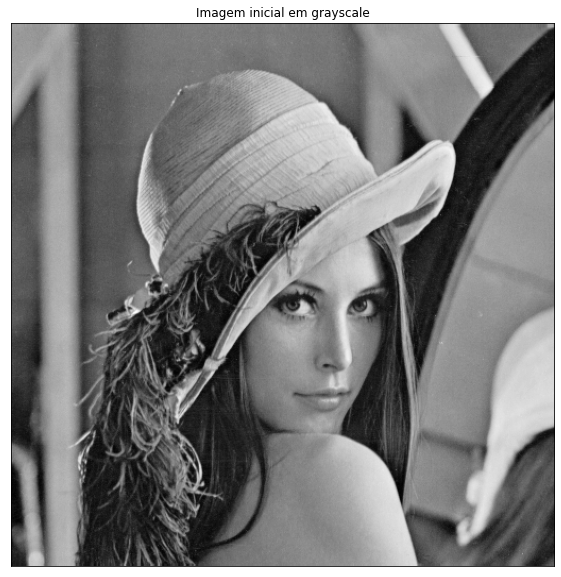

In [55]:
#https://docs.opencv.org/master/de/dbc/tutorial_py_fourier_transform.html

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/lena_std.tif',0) # 0 para grayscale

plt.figure(figsize = (10,10))
plt.imshow(img, cmap = 'gray')
plt.title('Imagem inicial em grayscale'), plt.xticks([]), plt.yticks([])
plt.show()

# Usaremos o Numpy para executar a transformada com a função fft.

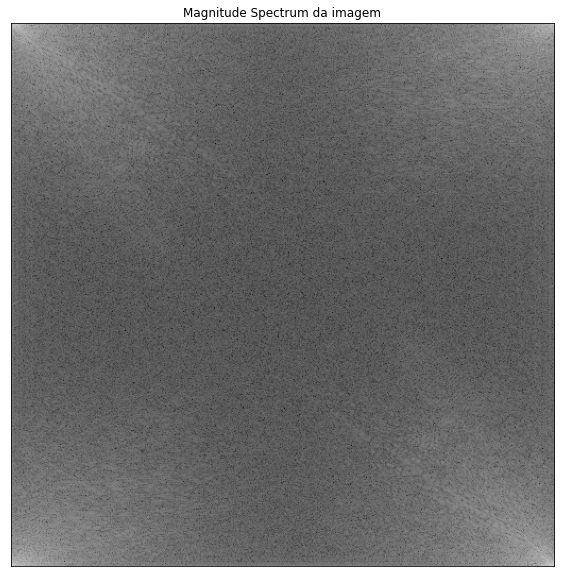

In [57]:
f = np.fft.fft2(img)

magnitude_spectrum = 20*np.log(np.abs(f))

plt.figure(figsize = (10,10))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum da imagem'), plt.xticks([]), plt.yticks([])
plt.show()

# Podemos alterar o conteudo de frequencia, movendo as menores para o centro.

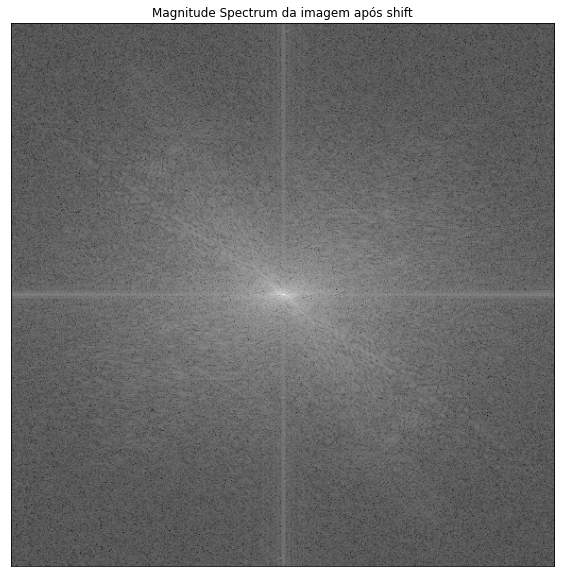

In [60]:
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.figure(figsize = (10,10))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum da imagem após shift'), plt.xticks([]), plt.yticks([])
plt.show()

# Agora podemos alterar seu conteudo conforme a necessidade. Nesse exemplo criaremos um filtro passa-alta. Apagaremos as frequencias no centro, onde no momento estão as menores.

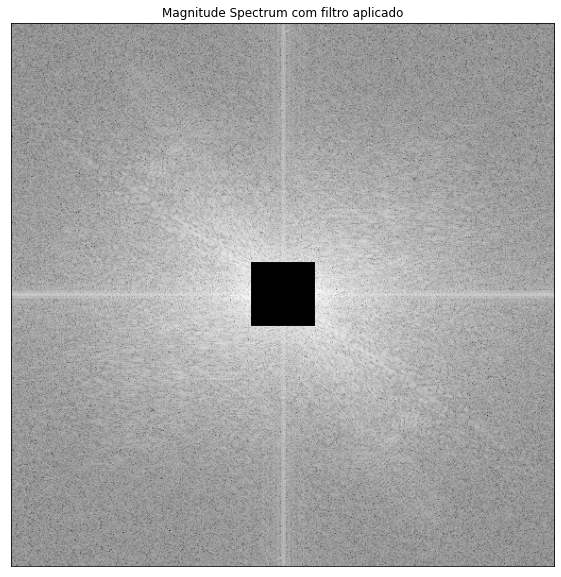

In [62]:
rows, cols = img.shape
crow, ccol = rows/2 , cols/2

fshift[int(crow)-30:int(crow)+30, int(ccol)-30:int(ccol)+30] = 0

magnitude_spectrum_before = 20*np.log10(np.abs(fshift), out=np.abs(fshift), where=np.abs(fshift) > 0)

plt.figure(figsize = (10,10))
plt.imshow(magnitude_spectrum_before, cmap = 'gray')
plt.title('Magnitude Spectrum com filtro aplicado'), plt.xticks([]), plt.yticks([])
plt.show()

# Por fim, recuperamos a imagem usando a FFT Inversa.

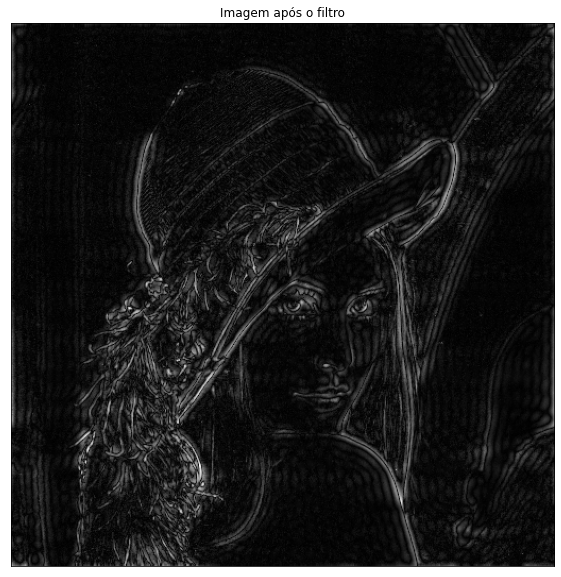

In [64]:
f_ishift = np.fft.ifftshift(fshift)

img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize = (10,10))
plt.imshow(img_back, cmap = 'gray')
plt.title('Imagem após o filtro'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
#https://docs.opencv.org/master/de/dbc/tutorial_py_fourier_transform.html

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Iniciamos a imagem
img = cv2.imread('images/lena_std.tif',0)

# Fazemos a FFT da imagem
f = np.fft.fft2(img)

# Fazemos o shift de frequencia para que as menores fiquem no centro
fshift = np.fft.fftshift(f)

# Calculamos o Espectro de Fourier da função
magnitude_spectrum = 20*np.log(np.abs(fshift))

# Zeramos as frequencias do centro
rows, cols = img.shape
crow, ccol = rows/2 , cols/2
fshift[int(crow)-30:int(crow)+30, int(ccol)-30:int(ccol)+30] = 0

# Recriamos a imagem com a FFT inversa
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize = (10,10))
plt.imshow(img_back, cmap = 'gray')
plt.show()